In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from dython import nominal, data_utils

# Change display limit to prevent truncating
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Loading

In [2]:
# Loading of train and test data
train_data_raw = pd.read_csv('../data/train.csv')
test_data_raw = pd.read_csv('../data/test.csv')

In [3]:
train_data_raw.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data_raw.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The test data does not have a target feature so I will sample a test data from the testing phase

## Data Exploration

### Data Information

In [5]:
# Get some info from the data
train_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Some categorical data are considered as continuous.

In [6]:
# Get the data unique values
train_data_raw.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [7]:
# Describe the data
train_data_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Adjust Feature Types, Some categorical features appeared as continuous
train_data_raw = train_data_raw.astype({
    "MSSubClass": object,
    "OverallQual": object,
    "OverallCond": object,
    "MoSold": object,
    "YrSold": object,
    "YearBuilt": object,
    "YearRemodAdd": object,
    "BsmtFullBath": object,
    "BsmtHalfBath": object,
    "FullBath": object,
    "HalfBath": object,
    "BedroomAbvGr": object,
    "KitchenAbvGr": object,
    "TotRmsAbvGrd": object,
    "Fireplaces": object,
    "GarageYrBlt": object,
    "GarageCars": object
})
train_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [9]:
# Create additional features for better predictions

from datetime import date

todays_date = date.today()
train_data_raw['YearsSinceBuilt'] = todays_date.year - train_data_raw['YearBuilt']
train_data_raw['YearsSinceRemodAdd'] = todays_date.year - train_data_raw['YearRemodAdd']
train_data_raw['YearsSinceGarageYrBlt'] = todays_date.year - train_data_raw['GarageYrBlt']

train_data_raw.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearsSinceBuilt,YearsSinceRemodAdd,YearsSinceGarageYrBlt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,19,19,19.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,46,46,46.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,21,20,21.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,107,52,24.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,22,22,22.0


### Correlation between features

#### Continuous Features

In [10]:
train_data_corr = train_data_raw.corr()
_corr = train_data_corr.sort_values(["SalePrice"], ascending = False)
# The first 4 most correlated continuous features
_corr.SalePrice

SalePrice        1.000000
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843
BsmtUnfSF        0.214479
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

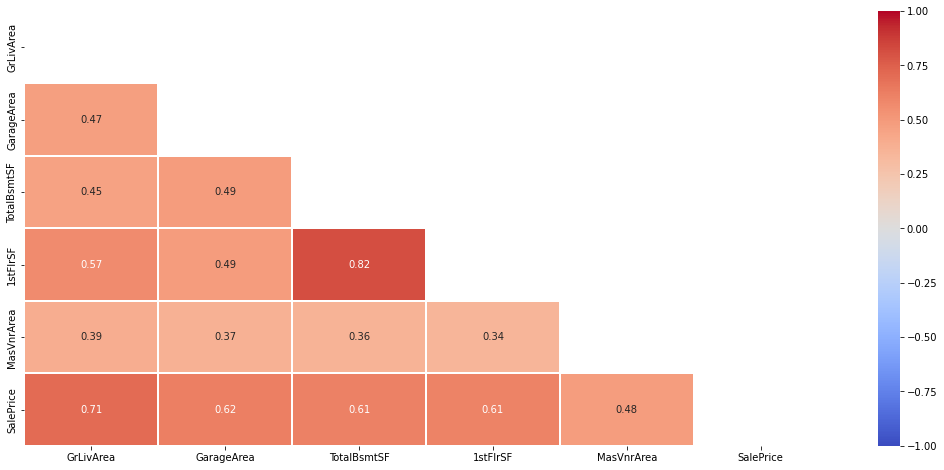

In [11]:
# Show the correlation among them and the target feature
correlated_features = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea', 'SalePrice']
_corr = train_data_corr.loc[correlated_features, correlated_features]
plt.figure(figsize=(18, 8))
mask = np.zeros_like(_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(_corr, vmin=-1, vmax=1, cmap='coolwarm', mask = mask,annot=True, linewidths=0.1)
plt.show()

Based on the correlations with the target feature and among the features, I selected <b>GrLiveArea, GarageArea, TotalBsmtSF</b>

#### Categorical Features

In [12]:
# Use a different package to find correlation between continuous and categorical features
continuous_features = data_utils.identify_columns_by_type(train_data_raw, include=['int64', 'float64']).remove('SalePrice')
categorical_data_corr_result = nominal.associations(train_data_raw, figsize=(18, 18), mark_columns=True, compute_only=True,
                     hide_columns=continuous_features,
                    hide_rows=continuous_features)
categorical_data_corr = pd.DataFrame(categorical_data_corr_result['corr'])

categorical_data_corr.sort_values(["SalePrice (con)"], ascending = False, inplace = True)
# The first 14 most correlated continuous features
categorical_data_corr["SalePrice (con)"]

SalePrice (con)                1.000000
OverallQual (con)              0.790982
Neighborhood (nom)             0.738630
GrLivArea (con)                0.708624
ExterQual (nom)                0.690933
BsmtQual (nom)                 0.681905
KitchenQual (nom)              0.675721
GarageCars (con)               0.640409
GarageArea (con)               0.623431
TotalBsmtSF (con)              0.613581
1stFlrSF (con)                 0.605852
FullBath (con)                 0.560664
GarageFinish (nom)             0.553059
FireplaceQu (nom)              0.542181
TotRmsAbvGrd (con)             0.533723
YearBuilt (con)                0.522897
YearRemodAdd (con)             0.507101
Foundation (nom)               0.506328
GarageType (nom)               0.499204
MasVnrArea (con)               0.472614
Fireplaces (con)               0.466929
BsmtFinType1 (nom)             0.459141
HeatingQC (nom)                0.442154
MasVnrType (nom)               0.434537
Exterior2nd (nom)              0.392211


### Explore features (Which categorical values will help us make better predictions)

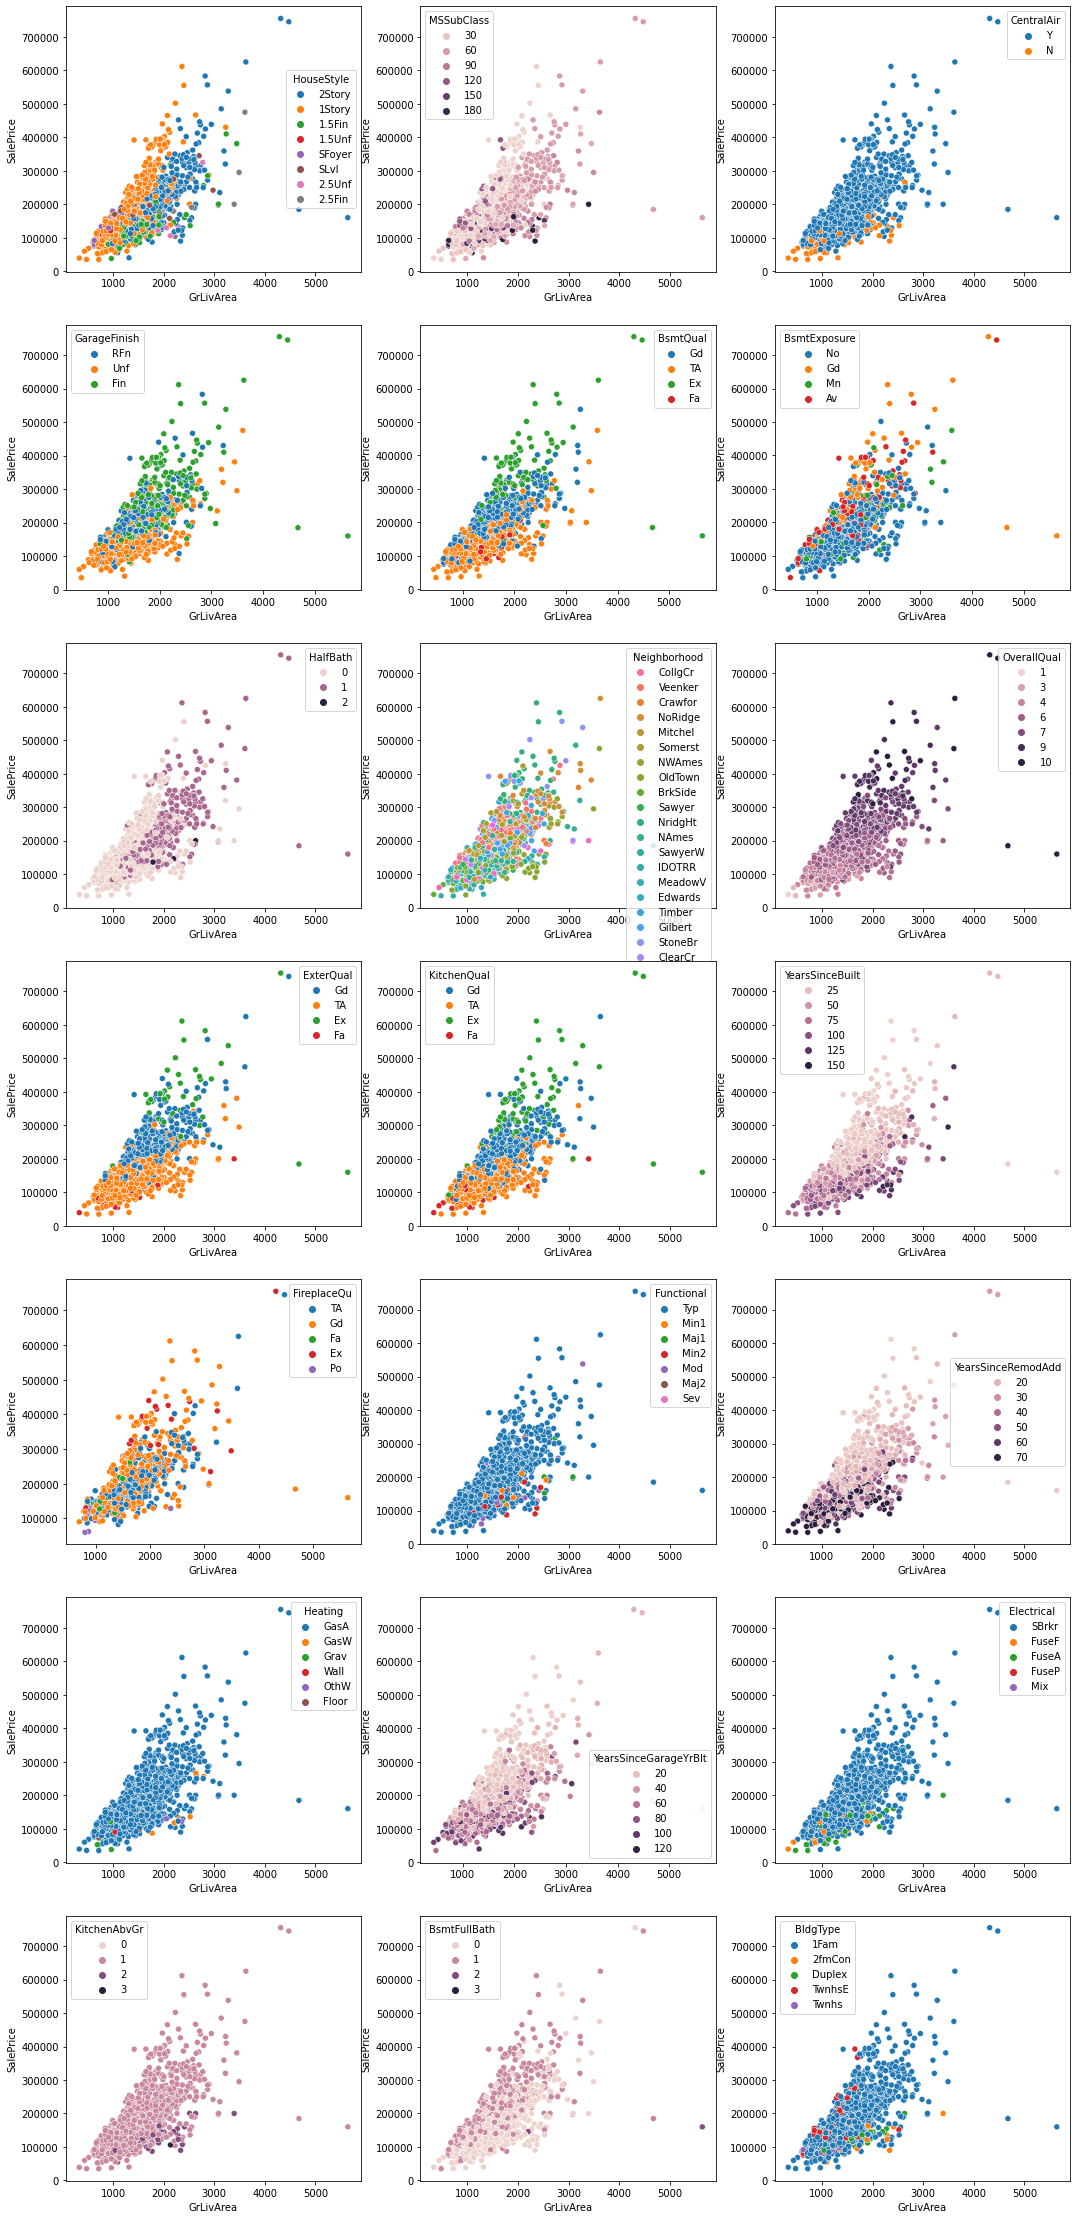

In [13]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(18,40))

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='HouseStyle', ax=axes[0,0])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='MSSubClass', ax=axes[0,1])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='CentralAir', ax=axes[0,2])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='GarageFinish', ax=axes[1,0])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='BsmtQual', ax=axes[1,1])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='BsmtExposure', ax=axes[1,2])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='HalfBath', ax=axes[2,0])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='Neighborhood', ax=axes[2,1])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='OverallQual', ax=axes[2,2])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='ExterQual', ax=axes[3,0])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='KitchenQual', ax=axes[3,1])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='YearsSinceBuilt', ax=axes[3,2])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='FireplaceQu', ax=axes[4,0])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='Functional', ax=axes[4,1])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='YearsSinceRemodAdd', ax=axes[4,2])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='Heating', ax=axes[5,0])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='YearsSinceGarageYrBlt', ax=axes[5,1])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='Electrical', ax=axes[5,2])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='KitchenAbvGr', ax=axes[6,0])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='BsmtFullBath', ax=axes[6,1])

sns.scatterplot(data=train_data_raw, x='GrLivArea', y='SalePrice', hue='BldgType', ax=axes[6,2])

plt.show()

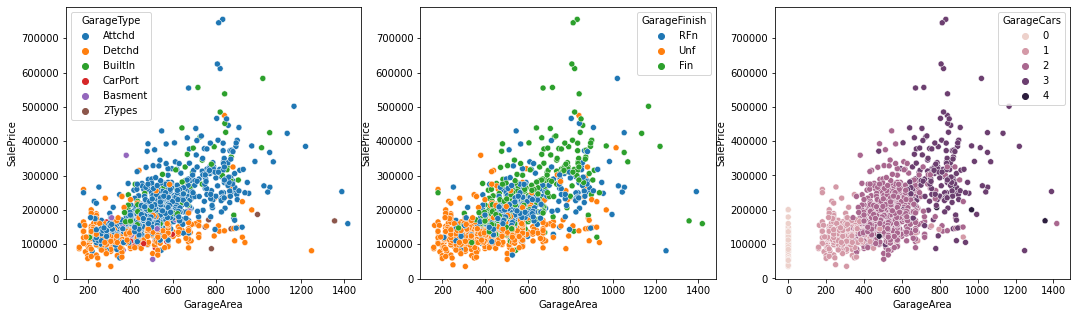

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

sns.scatterplot(data=train_data_raw, x='GarageArea', y='SalePrice', hue='GarageType', ax=axes[0])

sns.scatterplot(data=train_data_raw, x='GarageArea', y='SalePrice', hue='GarageFinish', ax=axes[1])

sns.scatterplot(data=train_data_raw, x='GarageArea', y='SalePrice', hue='GarageCars', ax=axes[2])

plt.show()

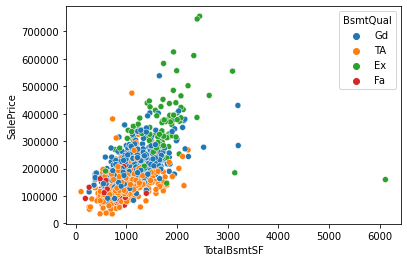

In [15]:
sns.scatterplot(data=train_data_raw, x='TotalBsmtSF', y='SalePrice', hue='BsmtQual')

plt.show()

Based on the graph, I selected <b>GrLivArea, GarageArea, TotalBsmtSF, HouseStyle, Neighborhood, OverallQual, ExterQual, KitchenQual, Functional, FireplaceQu, YearsSinceBuilt, YearsSinceRemodAdd, BsmtExposure, HalfBath, YearsSinceGarageYrBlt, Electrical, BsmtFullBath, BldgType, KitchenAbvGr, Heating, CentralAir, GarageType, GarageFinish, BsmtQual, SalePrice</b>

## Data Cleaning

In [16]:
selected_features = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', 'HouseStyle', 'Neighborhood', 'OverallQual', 'ExterQual', 'KitchenQual', 'Functional', 'FireplaceQu', 'YearsSinceBuilt', 'YearsSinceRemodAdd', 'BsmtExposure', 'HalfBath', 'YearsSinceGarageYrBlt', 'Electrical', 'BsmtFullBath', 'BldgType', 'KitchenAbvGr', 'Heating', 'CentralAir', 'GarageType', 'GarageFinish', 'BsmtQual', 'SalePrice']
train_data = train_data_raw[selected_features]
train_data.head(5)

,GrLivArea,GarageArea,TotalBsmtSF,HouseStyle,Neighborhood,OverallQual,ExterQual,KitchenQual,Functional,FireplaceQu,YearsSinceBuilt,YearsSinceRemodAdd,BsmtExposure,HalfBath,YearsSinceGarageYrBlt,Electrical,BsmtFullBath,BldgType,KitchenAbvGr,Heating,CentralAir,GarageType,GarageFinish,BsmtQual,SalePrice
0,1710,548,856,2Story,CollgCr,7,Gd,Gd,Typ,NaN,19,19,No,1,19.0,SBrkr,1,1Fam,1,GasA,Y,Attchd,RFn,Gd,208500
1,1262,460,1262,1Story,Veenker,6,TA,TA,Typ,TA,46,46,Gd,0,46.0,SBrkr,0,1Fam,1,GasA,Y,Attchd,RFn,Gd,181500
2,1786,608,920,2Story,CollgCr,7,Gd,Gd,Typ,TA,21,20,Mn,1,21.0,SBrkr,1,1Fam,1,GasA,Y,Attchd,RFn,Gd,223500
3,1717,642,756,2Story,Crawfor,7,TA,Gd,Typ,Gd,107,52,No,0,24.0,SBrkr,1,1Fam,1,GasA,Y,Detchd,Unf,TA,140000
4,2198,836,1145,2Story,NoRidge,8,Gd,Gd,Typ,TA,22,22,Av,1,22.0,SBrkr,1,1Fam,1,GasA,Y,Attchd,RFn,Gd,250000


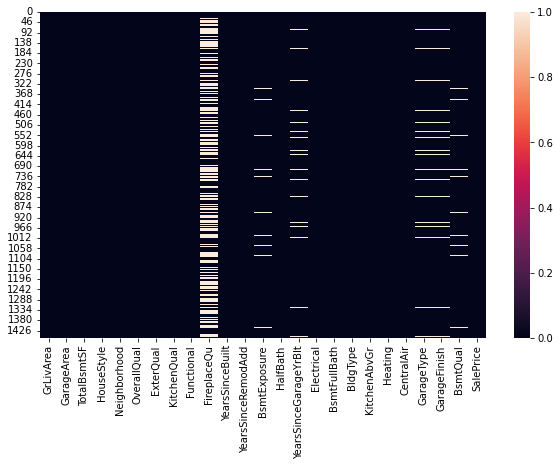

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isna())
plt.show()

In [18]:
%%capture --no-display
# Specify null values in BsmtQual as No (No basement)
train_data.loc[:, 'BsmtQual'] = train_data.loc[:, 'BsmtQual'].fillna('No')
train_data.loc[:, 'GarageType'] = train_data.loc[:, 'GarageType'].fillna('No')
train_data.loc[:, 'GarageFinish'] = train_data.loc[:, 'GarageFinish'].fillna('No')
train_data.loc[:, 'FireplaceQu'] = train_data.loc[:, 'FireplaceQu'].fillna('No')
train_data.loc[:, 'BsmtExposure'] = train_data.loc[:, 'BsmtExposure'].fillna('No')
train_data.loc[:, 'YearsSinceGarageYrBlt'] = train_data.loc[:, 'YearsSinceGarageYrBlt'].fillna(0)

train_data.dropna(subset='Electrical', axis=0, inplace=True)

train_data.isna().values.sum()

0

## Data Selection

In [19]:
selected_categorical_features = ['HouseStyle', 'CentralAir', 'GarageType', 'GarageFinish', 'Neighborhood', 'OverallQual', 'ExterQual', 'KitchenQual', 'Functional', 'FireplaceQu', 'Heating', 'BsmtExposure', 'HalfBath', 'YearsSinceGarageYrBlt', 'Electrical', 'BsmtFullBath', 'BldgType', 'KitchenAbvGr', 'BsmtQual']
selected_continuous_features = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearsSinceBuilt', 'YearsSinceRemodAdd']

In [20]:
# Our target feature
y = train_data['SalePrice']

In [21]:
# Our predictors
X_cat = train_data[selected_categorical_features]
X_con = train_data[selected_continuous_features]

## Data Encoding

### Label Encoding

In [22]:
X_cat = X_cat.replace(
    {
        "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
        "CentralAir" : {"N" : 0, "Y" : 1},
        "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
        "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
        "GarageFinish" : {"No" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
        "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
        "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
        "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd": 3}
    }
)

X_cat.head(5)

,HouseStyle,CentralAir,GarageType,GarageFinish,Neighborhood,OverallQual,ExterQual,KitchenQual,Functional,FireplaceQu,Heating,BsmtExposure,HalfBath,YearsSinceGarageYrBlt,Electrical,BsmtFullBath,BldgType,KitchenAbvGr,BsmtQual
0,2Story,1,Attchd,2,CollgCr,7,4,4,8,0,GasA,0,1,19.0,SBrkr,1,1Fam,1,4
1,1Story,1,Attchd,2,Veenker,6,3,3,8,3,GasA,3,0,46.0,SBrkr,0,1Fam,1,4
2,2Story,1,Attchd,2,CollgCr,7,4,4,8,3,GasA,1,1,21.0,SBrkr,1,1Fam,1,4
3,2Story,1,Detchd,1,Crawfor,7,3,4,8,4,GasA,0,0,24.0,SBrkr,1,1Fam,1,3
4,2Story,1,Attchd,2,NoRidge,8,4,4,8,3,GasA,2,1,22.0,SBrkr,1,1Fam,1,4


### One-Hot Encoding

In [23]:
# Apply One-Hot Encoding to Neighborhood
X_cat = pd.get_dummies(X_cat, columns=['HouseStyle', 'GarageType', 'Neighborhood', 'Heating', 'Electrical', 'BldgType'], prefix=['HS', 'GT', 'N', 'H', 'E', 'BT'])
X_cat.head(5)

,CentralAir,GarageFinish,OverallQual,ExterQual,KitchenQual,Functional,FireplaceQu,BsmtExposure,HalfBath,YearsSinceGarageYrBlt,BsmtFullBath,KitchenAbvGr,BsmtQual,HS_1.5Fin,HS_1.5Unf,HS_1Story,HS_2.5Fin,HS_2.5Unf,HS_2Story,HS_SFoyer,HS_SLvl,GT_2Types,GT_Attchd,GT_Basment,GT_BuiltIn,GT_CarPort,GT_Detchd,GT_No,N_Blmngtn,N_Blueste,N_BrDale,N_BrkSide,N_ClearCr,N_CollgCr,N_Crawfor,N_Edwards,N_Gilbert,N_IDOTRR,N_MeadowV,N_Mitchel,N_NAmes,N_NPkVill,N_NWAmes,N_NoRidge,N_NridgHt,N_OldTown,N_SWISU,N_Sawyer,N_SawyerW,N_Somerst,N_StoneBr,N_Timber,N_Veenker,H_Floor,H_GasA,H_GasW,H_Grav,H_OthW,H_Wall,E_FuseA,E_FuseF,E_FuseP,E_Mix,E_SBrkr,BT_1Fam,BT_2fmCon,BT_Duplex,BT_Twnhs,BT_TwnhsE
0,1,2,7,4,4,8,0,0,1,19.0,1,1,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,1,2,6,3,3,8,3,3,0,46.0,0,1,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,1,2,7,4,4,8,3,1,1,21.0,1,1,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,1,1,7,3,4,8,4,0,0,24.0,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,1,2,8,4,4,8,3,2,1,22.0,1,1,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0


## Modeling

### Training (Polynomial linear regression)

In [24]:
# Metric
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)


### Training (Multiple linear regression)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = pd.concat([X_con, X_cat], axis = 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Scaling
std_scaler = StandardScaler()
X_train.loc[:, selected_continuous_features] = std_scaler.fit_transform(X_train.loc[:, selected_continuous_features])
X_test.loc[:, selected_continuous_features] = std_scaler.transform(X_test.loc[:, selected_continuous_features])

X_train.head(5)

,GrLivArea,GarageArea,TotalBsmtSF,YearsSinceBuilt,YearsSinceRemodAdd,CentralAir,GarageFinish,OverallQual,ExterQual,KitchenQual,Functional,FireplaceQu,BsmtExposure,HalfBath,YearsSinceGarageYrBlt,BsmtFullBath,KitchenAbvGr,BsmtQual,HS_1.5Fin,HS_1.5Unf,HS_1Story,HS_2.5Fin,HS_2.5Unf,HS_2Story,HS_SFoyer,HS_SLvl,GT_2Types,GT_Attchd,GT_Basment,GT_BuiltIn,GT_CarPort,GT_Detchd,GT_No,N_Blmngtn,N_Blueste,N_BrDale,N_BrkSide,N_ClearCr,N_CollgCr,N_Crawfor,N_Edwards,N_Gilbert,N_IDOTRR,N_MeadowV,N_Mitchel,N_NAmes,N_NPkVill,N_NWAmes,N_NoRidge,N_NridgHt,N_OldTown,N_SWISU,N_Sawyer,N_SawyerW,N_Somerst,N_StoneBr,N_Timber,N_Veenker,H_Floor,H_GasA,H_GasW,H_Grav,H_OthW,H_Wall,E_FuseA,E_FuseF,E_FuseP,E_Mix,E_SBrkr,BT_1Fam,BT_2fmCon,BT_Duplex,BT_Twnhs,BT_TwnhsE
1454,-0.566544,-0.364548,0.351911,-1.092875,-0.992176,1,2,7,4,4,8,0,0,0,18.0,1,1,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1099,0.131092,0.008401,0.464935,-0.219798,0.331510,1,2,7,3,3,8,3,0,0,44.0,0,1,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
416,-0.237921,-0.173292,-0.889092,-0.219798,0.331510,1,3,6,3,3,8,3,0,1,44.0,0,1,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1168,1.061886,0.304848,0.139426,1.224136,-0.060694,1,1,6,3,4,8,3,0,0,87.0,0,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
670,-0.098393,0.304848,-0.739901,-1.126455,-0.992176,1,3,6,4,4,8,0,0,1,17.0,1,1,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [26]:
# Train
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
compute_rmsle(y_test, y_pred)

0.14

The <b>RMSLE</b> score is 0.14 <br>
I am trying improve it but so far no success.